In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection
from scipy.stats import zscore

%matplotlib inline
sns.set(style='white', context='notebook')

In [2]:
pip install scikit-learn 

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv(r"C:\Users\BAPS\Downloads\Data_Train.csv")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data['Route'] = data['Route'].ffill(axis=0)

In [8]:
data['Route'].isnull().sum()

np.int64(0)

In [9]:
data['Total_Stops'] = data['Total_Stops'].ffill(axis=0)
data['Total_Stops'].isnull().sum()

np.int64(0)

In [10]:
data['Journey_day'] = pd.to_datetime(data['Date_of_Journey']).dt.day

C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\2296601392.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Journey_day'] = pd.to_datetime(data['Date_of_Journey']).dt.day


In [11]:
data['Journey_month'] = pd.to_datetime(data['Date_of_Journey']).dt.month

C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\629095302.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Journey_month'] = pd.to_datetime(data['Date_of_Journey']).dt.month


In [12]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [14]:
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data.drop(['Dep_Time'], axis=1, inplace=True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\2282263422.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\2282263422.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute


In [15]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [16]:
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop(['Arrival_Time'], axis=1, inplace=True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\1362607987.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\1362607987.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins

In [19]:
data.drop(['Duration'], axis=1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [20]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

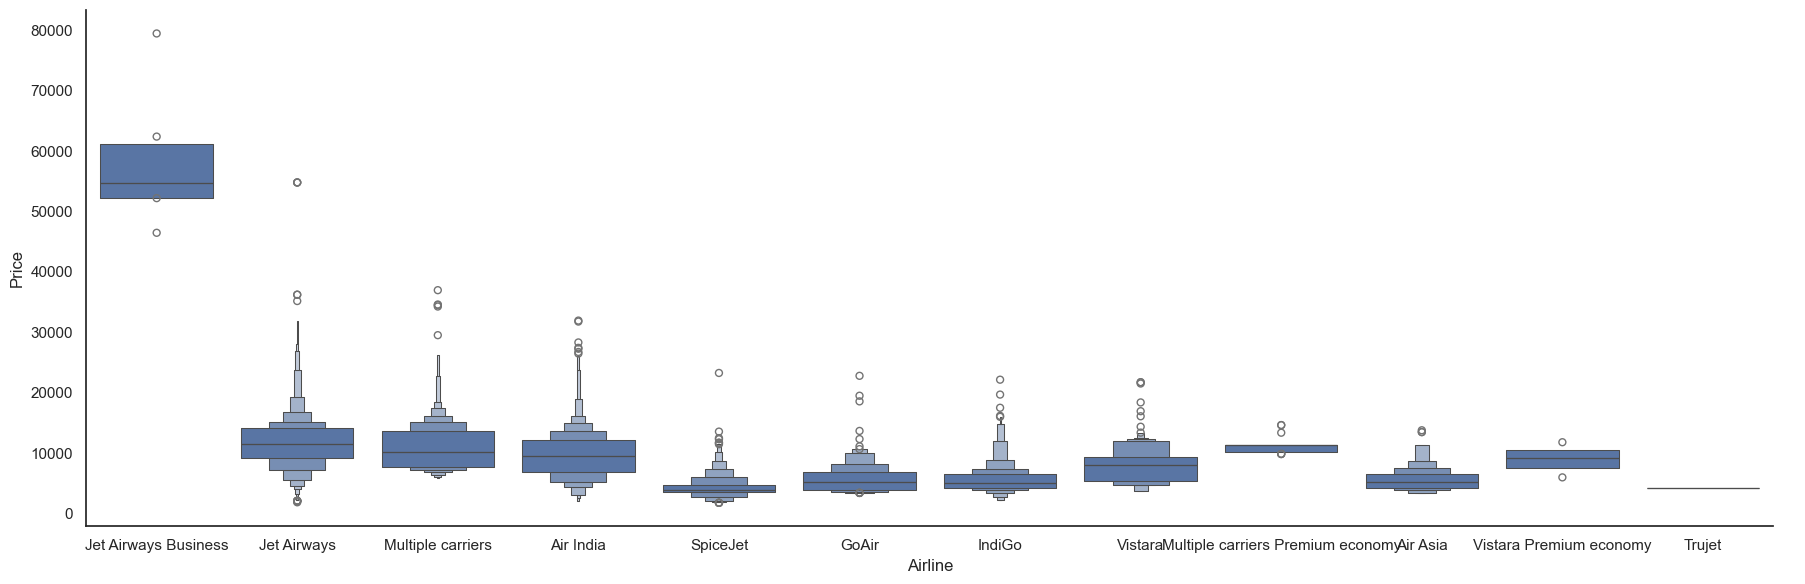

In [21]:
sns.catplot(y = 'Price', x='Airline', data=data.sort_values('Price', ascending=False),  kind="boxen", height = 6, aspect = 3)
plt.show()

In [22]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True).astype(int)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [23]:
data['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

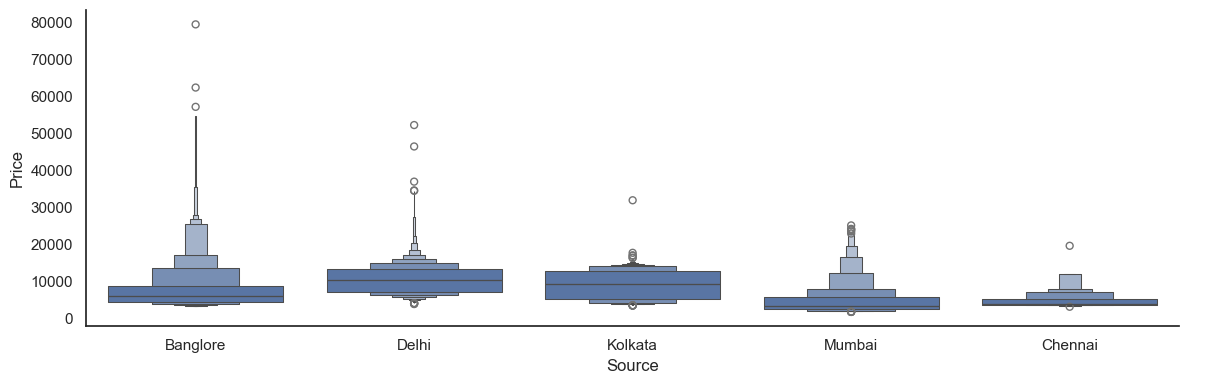

In [24]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [25]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True).astype(int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [26]:
data["Destination"].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [27]:

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True).astype(int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [29]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
df['air qality index'] = df['air qality index'].ffill(axis=0)
df['air qality index'] = df['air qality index'].fillna(method = 'bfill')
df['air qality index'] = df['air qality index'].fillna(0)
df['air qality index'] = df['air qality index'].fillna(df['air qality index'].mean())
df['air qality index'] = df['air qality index'].fillna(df['air qality index'].median())
df['air qality index'] = df['air qality index'].fillna(df['air qality index'].mode()[0])
df = df.fillna(df.mean())

In [30]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [31]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys


data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\2566791511.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [32]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25


In [33]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0


In [34]:
train_data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [35]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [36]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [37]:
train_data.drop(['Duration'],axis=1, inplace=True)
# train_data

In [38]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [39]:
train_data.shape

(10683, 30)

# Test set

In [40]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [52]:
test_data = pd.read_excel(r"C:\Users\BAPS\OneDrive\Desktop\Test_set.xlsx")

In [53]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
test_data.shape 

(2671, 10)

In [55]:
print("Test data Info")
print("-"*75)
print(test_data.info())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [56]:
print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [57]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\1228754977.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\1228754977.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\1228754977.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\BAPS\AppData\Local

In [58]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [59]:
# Categorical data

print("Airline")
print()
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True).astype(int)

print()

print("Source")
print()
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True).astype(int)

print()

print("Destination")
print()
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True).astype(int)

# test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

Airline

Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source

Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination

Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: int64


C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\417352913.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [64]:
test_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,0


In [61]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [62]:
print("Shape of test data : ", data_test.shape)

Shape of test data :  (2671, 30)


In [65]:
data_test.head(2)

,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,...,0,0,0,1,0,0,0,0,0,0


## Feature Selection

In [66]:
train_data.shape

(10683, 30)

In [67]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [68]:
X = train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [70]:
x = train_data.drop(['Price'], axis=1)

In [71]:
y = data['Price']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8546, 29)
(2137, 29)
(8546,)
(2137,)


In [74]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
y_predict_lr_train = lr_model.predict(X_train)
y_predict_lr_test = lr_model.predict(X_test)

In [78]:
from sklearn.metrics import r2_score 
print(r2_score(y_train, y_predict_lr_train))
print("\n")
print(r2_score(y_test, y_predict_lr_test))

0.6251531149899903


0.6149458570493681


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_predict_rf_train = rf_model.predict(X_train)
y_predict_rf_test = rf_model.predict(X_test)
print(r2_score(y_train, y_predict_rf_train))
print("\n")
print(r2_score(y_test, y_predict_rf_test))

0.954476085778153


0.7835208634741413


C:\Users\BAPS\AppData\Local\Temp\ipykernel_13024\2521422225.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict_rf_test)


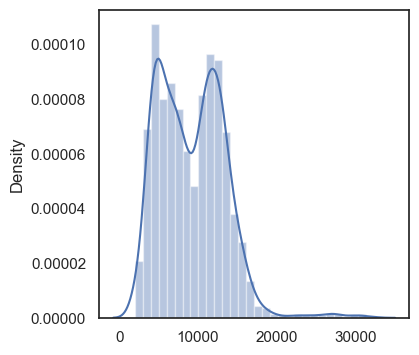

In [80]:
plt.figure(figsize=(4,4))
sns.distplot(y_predict_rf_test)
plt.show()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_19908\443877050.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict_rf_train)


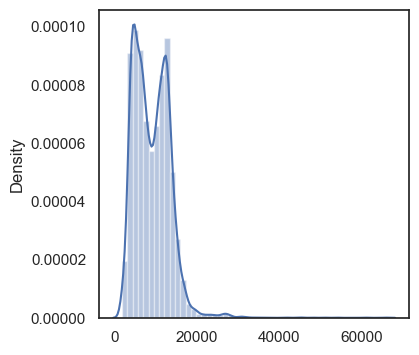

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_predict_rf_train)
plt.show()

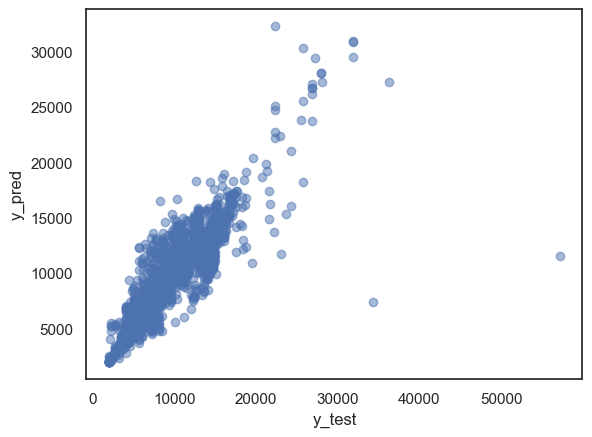

In [81]:
plt.scatter(y_test, y_predict_rf_test, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [82]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict_rf_test))
print('MSE:', metrics.mean_squared_error(y_test, y_predict_rf_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_rf_test)))

MAE: 1206.5610286545464
MSE: 4581557.097196204
RMSE: 2140.4572168572313


In [83]:
metrics.r2_score(y_test, y_predict_rf_test)

0.7835208634741413

In [ ]:
data_test.rename(columns=lambda x:{
    # Airline columns
    'Air India': 'Airline_Air India',
    'GoAir': 'Airline_GoAir',
    'IndiGo': 'Airline_IndiGo',
    'Jet Airways': 'Airline_Jet Air,ways',
    'Jet Airways Business': 'Airline_Jet Airways Business',
    'Multiple carriers': 'Airline_Multiple carriers',
    'Multiple carriers Premium economy': 'Airline_Multiple carriers Premium economy',
    'SpiceJet': 'Airline_Spi ceJet',
    'Vistara': 'Airline_Vistara',
    'Vistara Premium economy': 'Airline_Vistara Premium economy',
 
    # Source columns
    'Chennai': 'Source_Chennai',
    'Delhi': 'Source_Delhi',
    'Kolkata': 'Source_Kolkata',
    'Mumbai': 'Source_Mumbai',
 
    # Destination columns
    'Cochin': 'Destination_Kolkata',
    'Hyderabad': 'Destination_Hyderabad',
    'New Delhi': 'Destination_Delhi'
}.get(x, x), inplace=True)
 
 

In [86]:
data_test.isnull().sum()

Route                                        0
Total_Stops                                  0
Additional_Info                              0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [87]:
test_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x, y)  # Assuming x is your training data and y your target


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [105]:
# Ensure test data has all required columns
for col in x.columns:
    if col not in test_data.columns:
        test_data[col] = 0

# Align column order with training data
test_data = test_data[x.columns]

# Make predictions
predicted_prices = model.predict(test_data)

# Optional: Convert to a DataFrame for export or analysis

results = pd.DataFrame({'Predicted_Price': np.round(predicted_prices, 2)})
print(results.tail())


      Predicted_Price
2666          10203.0
2667           3782.0
2668           8258.0
2669          16666.0
2670           3673.0


In [ ]:
data['Price'] 

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

# Univariate Analysis

In [ ]:
# Scatter plot 

for column in data.columns :
    plt.figure()
    sns.scatterplot(data=data, x=column, y=data.index,hue=data.Price)

In [ ]:
res = data.select_dtypes(include=np.number).columns

for column in res :
    plt.figure(figsize=(4,4))
    sns.displot(data[column],color='darkorange',kind='kde')
    # sns.displot(data[column],color='darkorange',kind='hist')

# Observation : Here we can check the price and density of flight

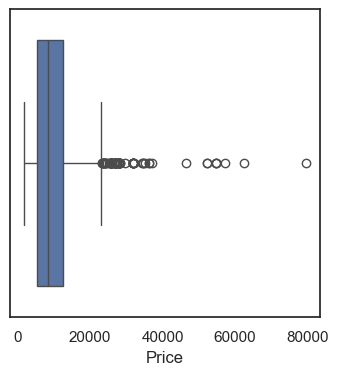

In [ ]:
for column in res :
    plt.figure(figsize=(4,4))
    sns.boxplot(x = data[column], data = data)

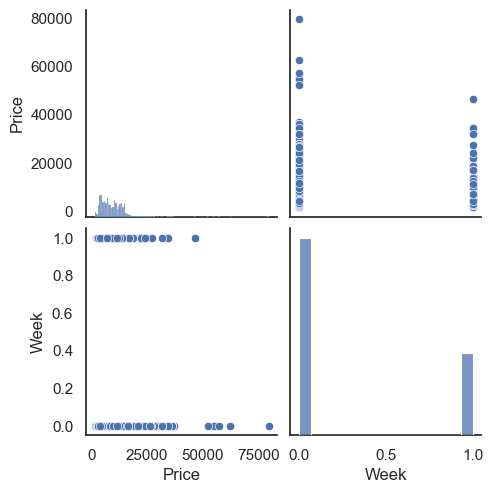

In [ ]:
sns.pairplot(data=data)

In [ ]:
skew = data['Price'].skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = data['Price'].kurt()
print(kurt)


Skew

1.8125523782189141

Kurt

13.30332953594456


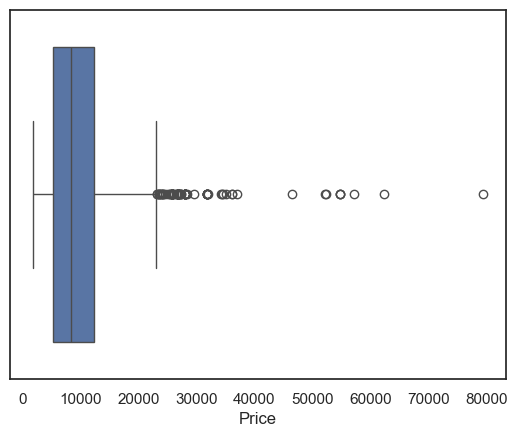

In [ ]:
from scipy.stats import zscore
 
z_scores = zscore(data['Price'])
filtered_dataset = data[abs(z_scores) <= 3]
filtered_dataset 

for column in res :
    plt.figure()
    sns.boxplot(x = data[column], data = data)

In [ ]:
Q1 = dataset.quantile(0.25)  # Q1
Q3 = dataset.quantile(0.75)  # Q3
IQR = Q3-Q1
dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
print('After IQR approach : ',dataset.shape)

In [ ]:
cn = ['electricity cost', 'water consumption']
 
# Calculate Q1 and Q3 for those columns only
Q1 = df[cn].quantile(0.10)
Q3 = df[cn].quantile(0.90)
IQR = Q3 - Q1
 
# Filter out outliers using the IQR method
df_filtered = df[~((df[cn] < (Q1 - 1.5 * IQR)) | (df[cn] > (Q3 + 1.5 * IQR))).any(axis=1)]
 
print('After IQR approach : ', df_filtered.shape)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
 
# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
# Remove outliers
df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
 
print("\nDataFrame after removing outliers:")
print(df_clean)

In [ ]:
# Calculate z-scores for the 'Starting_Salary' column
print('Before outlier removal : ',data.shape)
Pricing = zscore(data['Price'])
 
# Define a threshold for identifying outliers
threshold = 3
 
# Find outliers only in the 'Starting_Salary' column
outlier_Price = data[(np.abs(Pricing) > threshold)]
 
print(f"\nNumber of outliers found in 'Price' using a threshold of {threshold}: {len(outlier_Price)}")
# print("\n",outliers_salary)
 
# Remove outliers from the dataset
dataset_cleaned = data[(np.abs(Pricing) <= threshold)]
print('\nAfter Z-Score approach (outliers in Price removed) : ',dataset_cleaned.shape)

Before outlier removal :  (10683, 13)

Number of outliers found in 'Price' using a threshold of 3: 96

After Z-Score approach (outliers in Price removed) :  (10587, 13)


<Figure size 400x400 with 0 Axes>

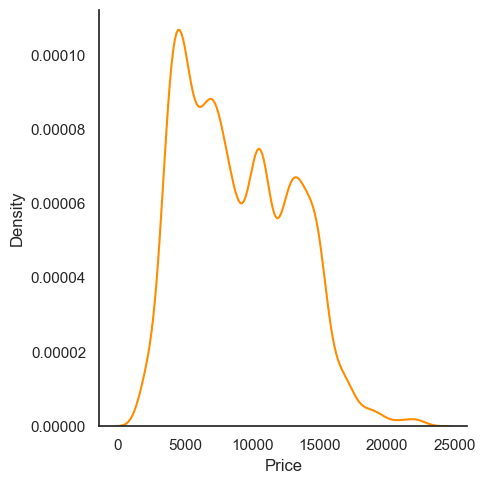

In [ ]:
res = dataset_cleaned.select_dtypes(include=np.number).columns

for column in res :
    plt.figure(figsize=(4,4))
    sns.displot(dataset_cleaned[column],color='darkorange',kind='kde')

In [ ]:
skew = dataset_cleaned['Price'].skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = dataset_cleaned['Price'].kurt()
print(kurt)


Skew

0.4120760731371064

Kurt

-0.6553391420322265


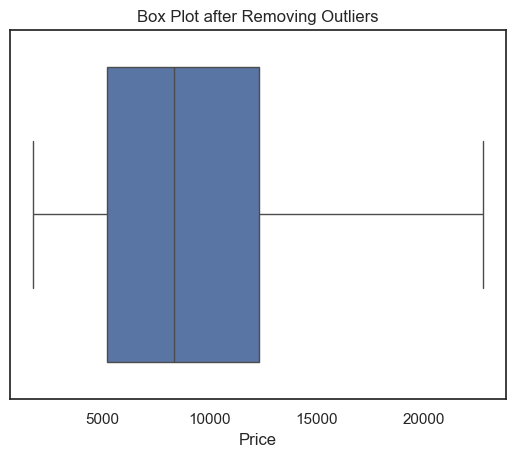

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot after outlier removal
sns.boxplot(data=dataset_cleaned, x='Price')  # replace with your actual column
plt.title('Box Plot after Removing Outliers')
plt.show()


In [ ]:
# cols = ['Avg. Area Number of Bedrooms']
Q1 = data['Price'].quantile(0.10)  # Q1
Q3 = data['Price'].quantile(0.90)  # Q3
IQR = Q3-Q1
dataset = data[~((data['Price']<(Q1-1.5*IQR)) | (data['Price']>(Q3+1.5*IQR)))]
print('After IQR approach : ',dataset.shape)

After IQR approach :  (10659, 13)


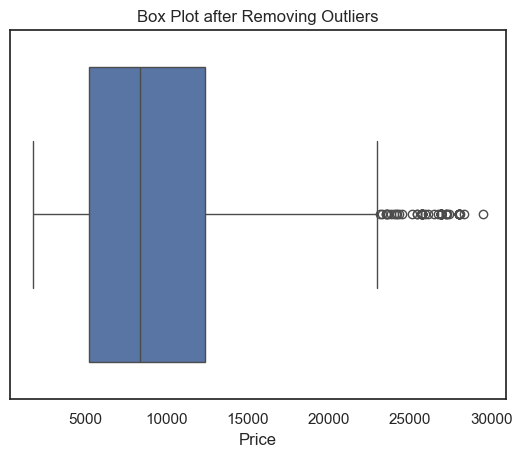

In [ ]:
sns.boxplot(data=dataset, x='Price')  # replace with your actual column
plt.title('Box Plot after Removing Outliers')
plt.show()

<Figure size 400x400 with 0 Axes>

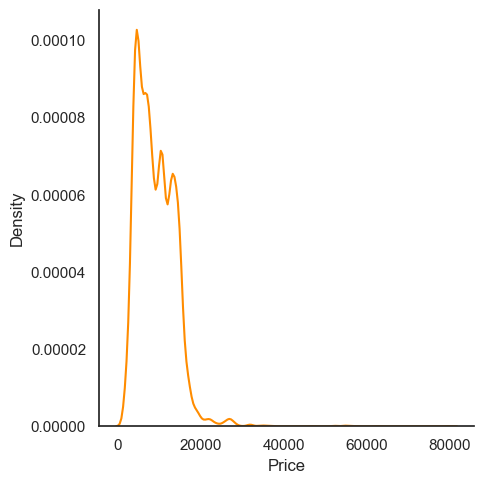

In [ ]:
res = data.select_dtypes(include=np.number).columns

for column in res :
    plt.figure(figsize=(4,4))
    sns.displot(data[column],color='darkorange',kind='kde')

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , RobustScaler, StandardScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data[['Price']])
scaled_df = pd.DataFrame(scaled_data, columns=['Price'])
scaled_df

,Price
0,-0.630637
1,-0.100056
2,0.776494
3,-0.303551
4,0.694758
...,...
10678,-0.601043
10679,-0.595688
10680,-0.161077
10681,0.602593


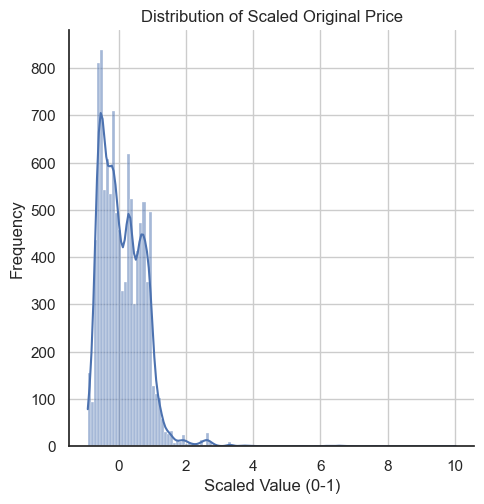

In [ ]:
sns.displot(data=scaled_df, x='Price', kde=True)
 
plt.title('Distribution of Scaled Original Price')
plt.xlabel('Scaled Value (0-1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

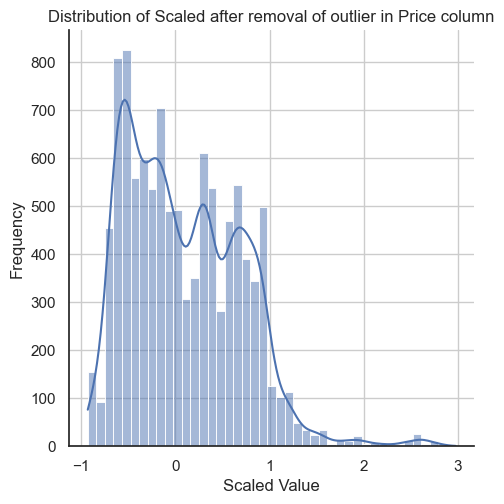

In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(dataset[['Price']])
scaled_df = pd.DataFrame(scaled_data, columns=['Price'])
scaled_df

sns.displot(data=scaled_df, x='Price', kde=True)
 
plt.title('Distribution of Scaled after removal of outlier in Price column')
plt.xlabel('Scaled Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show() 

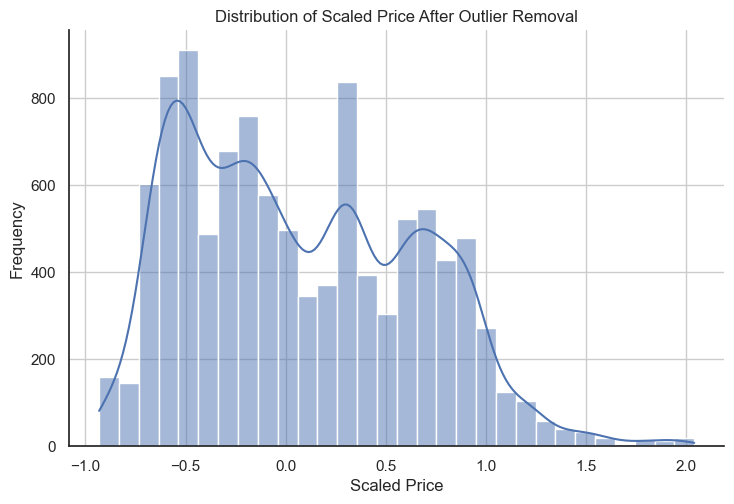

In [ ]:
# from sklearn.preprocessing import RobustScaler
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# Step 1: Scale the 'Price' column using the outlier-free dataset
scaler = RobustScaler()
scaled_data = scaler.fit_transform(filtered_dataset[['Price']])

# Step 2: Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Price'])

# Step 3: Plot the scaled distribution
sns.displot(data=scaled_df, x='Price', kde=True, bins=30, aspect=1.5)

# Step 4: Customize the plot
plt.title('Distribution of Scaled Price After Outlier Removal')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


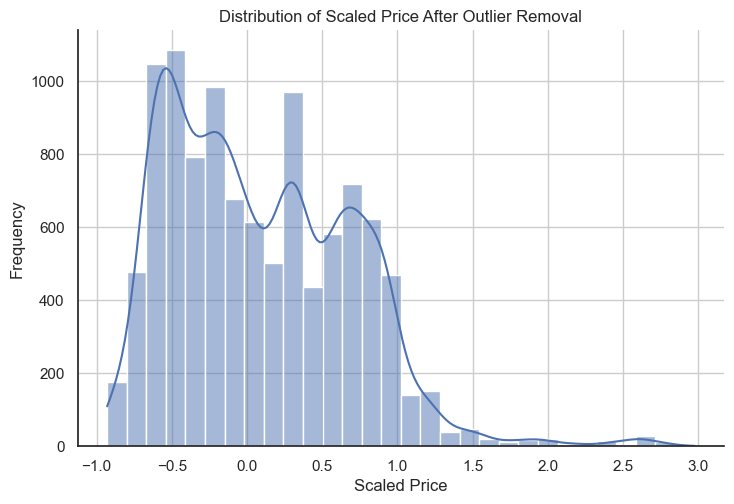

In [ ]:
# Step 1: Scale the 'Price' column using the outlier-free dataset
scaler = RobustScaler()
scaled_data = scaler.fit_transform(dataset[['Price']])

# Step 2: Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Price'])

# Step 3: Plot the scaled distribution
sns.displot(data=scaled_df, x='Price', kde=True, bins=30, aspect=1.5)

# Step 4: Customize the plot
plt.title('Distribution of Scaled Price After Outlier Removal')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

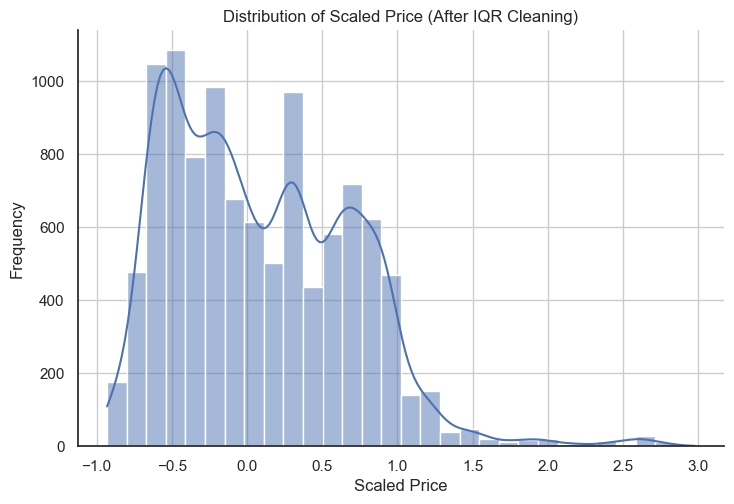

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1 already done: outlier removal using modified IQR
# dataset is your outlier-free DataFrame

# Step 2: Apply RobustScaler
scaler = RobustScaler()
scaled_price = scaler.fit_transform(dataset[['Price']])

# Step 3: Create a scaled DataFrame for visualization or modeling
scaled_df = pd.DataFrame(scaled_price, columns=['Price'])

# Step 4: Plot the distribution
sns.displot(data=scaled_df, x='Price', kde=True, bins=30, aspect=1.5)
plt.title('Distribution of Scaled Price (After IQR Cleaning)')
plt.xlabel('Scaled Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
x = data.drop(["Price"], axis=1)

In [ ]:
y = data['Price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split   #For dividing data into training and testing sets.
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split your data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)